In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import IsolationForest

plt.figure(dpi=200)
from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 1280x960 with 0 Axes>

## ***Data Exploration***

In [3]:
# Load the dataset
df = pd.read_csv('CC GENERAL.csv')

In [4]:
df = df.set_index("CUST_ID")

 Data Summary

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


 Data Info

In [6]:
df.shape

(8950, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

 Duplicates Check

In [8]:
df.duplicated().any()

False

In [9]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df[df["MINIMUM_PAYMENTS"].isnull()].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,0.0,313.0,313.000000
mean,555.441321,0.389403,393.087284,250.433387,142.653898,559.136698,0.336043,0.107886,0.244670,0.067169,1.460064,5.833866,3731.789137,322.286168,NaN,0.0,11.063898
std,1292.687887,0.408341,757.905701,624.453991,311.289043,1185.132567,0.372517,0.227370,0.359756,0.130087,3.182359,9.600908,2924.606153,1996.658905,NaN,0.0,1.869734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,NaN,0.0,6.000000
25%,0.187069,0.090909,1.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,0.000000,NaN,0.0,12.000000
50%,16.848358,0.181818,130.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,0.000000,NaN,0.0,12.000000
75%,286.686616,1.000000,399.950000,176.030000,152.280000,480.104401,0.583333,0.083333,0.416667,0.083333,1.000000,8.000000,5000.000000,0.000000,NaN,0.0,12.000000
max,9164.724752,1.000000,7597.090000,6761.290000,2959.240000,7616.064965,1.000000,1.000000,1.000000,1.000000,21.000000,77.000000,19500.000000,29272.486070,NaN,0.0,12.000000


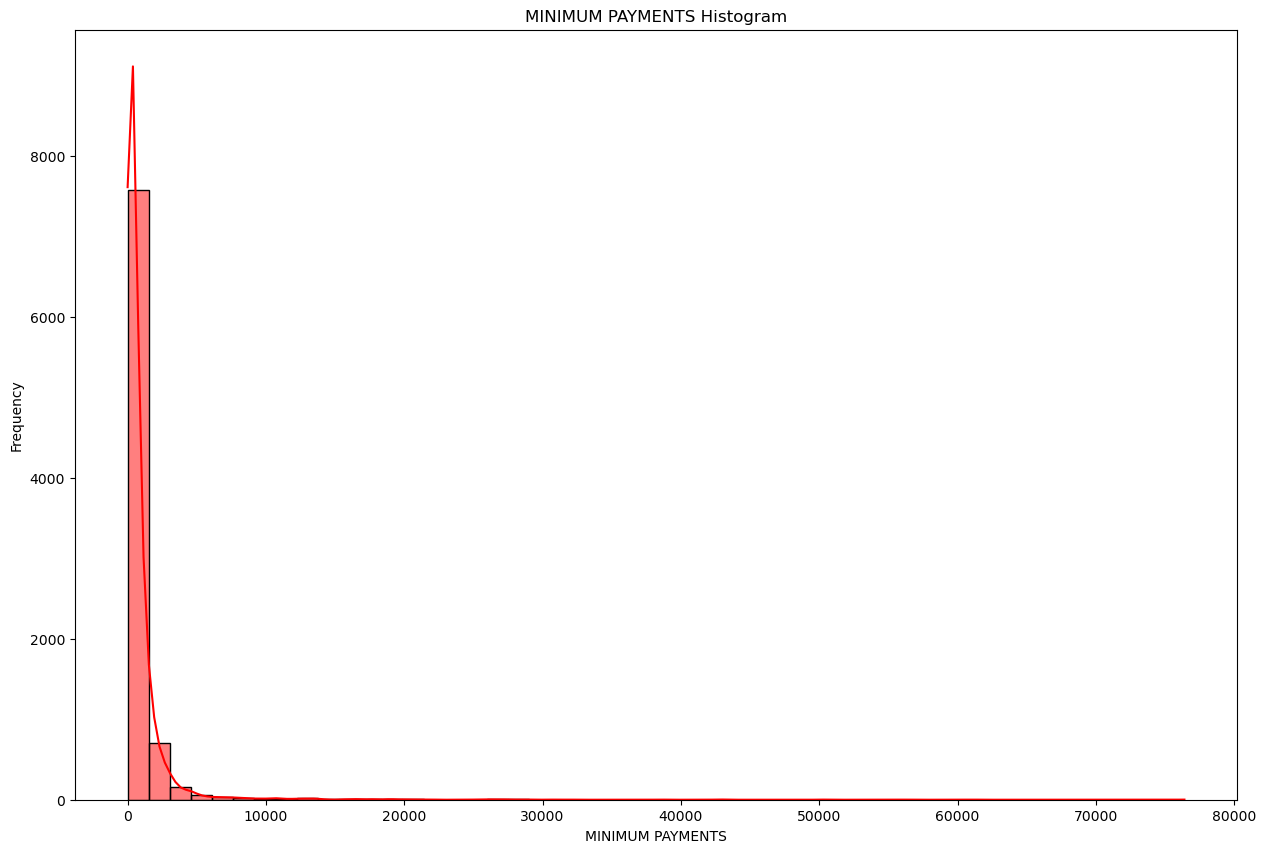

In [11]:
plt.figure(figsize=(15, 10))
sns.histplot(df['MINIMUM_PAYMENTS'], bins=50, alpha=0.5, color='r', kde=True)
plt.title('MINIMUM PAYMENTS Histogram')
plt.xlabel('MINIMUM PAYMENTS')
plt.ylabel('Frequency')
plt.show()

In [12]:
df[df["CREDIT_LIMIT"].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [13]:
q_ = df['MINIMUM_PAYMENTS'].quantile(0.25)

In [14]:
min_value = df['MINIMUM_PAYMENTS'].min()
df['MINIMUM_PAYMENTS'].fillna(min_value, inplace=True)
df["MINIMUM_PAYMENTS"].isnull().sum()

0

In [15]:
df["CREDIT_LIMIT"].isnull().sum()

1

In [16]:
df = df.dropna(subset=['CREDIT_LIMIT'], axis=0)
df["CREDIT_LIMIT"].isnull().sum()

0

In [17]:
df.shape

(8949, 17)

# **Data Cleaning**

In [18]:
# Data cleaning - removing outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as needed
outliers = outlier_detector.fit_predict(df)

# Filter out the rows identified as outliers
df_cleaned = df[outliers != -1]

# Normalisation of **data**

In [19]:
df_normalized = df
col = df.columns

scaler = StandardScaler()

df_normalized[col] = scaler.fit_transform(df_normalized[col])

df_normalized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297335,-0.525588,0.360541
C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088525,-0.525588,0.360541
C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357049,-0.525588,0.360541
C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541


## **EDA**

In [20]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297335,-0.525588,0.360541
C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088525,-0.525588,0.360541
C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357049,-0.525588,0.360541
C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541


In [21]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03
mean,0.000000,-3.144205e-16,-8.257509e-17,-4.128754e-17,1.746781e-17,-1.587982e-17,7.701715e-17,-6.351930e-18,4.605149e-17,-1.270386e-17,1.587982e-17,1.905579e-17,2.159656e-16,6.351930e-17,-1.746781e-17,-3.175965e-18,-2.794849e-16
std,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-0.751704,-3.705263e+00,-4.695839e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.221928e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.918405e-01,-1.221468e+00,-5.987332e-01,-3.570488e-01,-5.255884e-01,-4.126919e+00
25%,-0.690033,4.873144e-02,-4.509562e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.014290e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.516107e-01,-7.954817e-01,-4.663388e-01,-2.872662e-01,-5.255884e-01,3.605413e-01
50%,-0.331962,5.179802e-01,-3.003952e-01,-3.340632e-01,-3.561912e-01,-4.668054e-01,2.390672e-02,-3.993831e-01,-4.977267e-01,-6.752945e-01,-4.760829e-01,-3.102316e-01,-4.107196e-01,-3.026846e-01,-2.330458e-01,-5.255884e-01,3.605413e-01
75%,0.235279,5.179802e-01,5.001060e-02,-8.840161e-03,6.362342e-02,6.432979e-02,1.062103e+00,3.268871e-01,9.700395e-01,4.351431e-01,1.100315e-01,9.206698e-02,5.511855e-01,5.801121e-02,-1.941550e-02,-3.717957e-02,3.605413e-01
max,8.397195,5.179802e-01,2.248248e+01,2.419985e+01,2.442576e+01,2.201002e+01,1.269742e+00,2.673295e+00,1.599083e+00,6.820167e+00,1.754694e+01,1.381045e+01,7.009692e+00,1.692160e+01,3.235145e+01,2.893277e+00,3.605413e-01


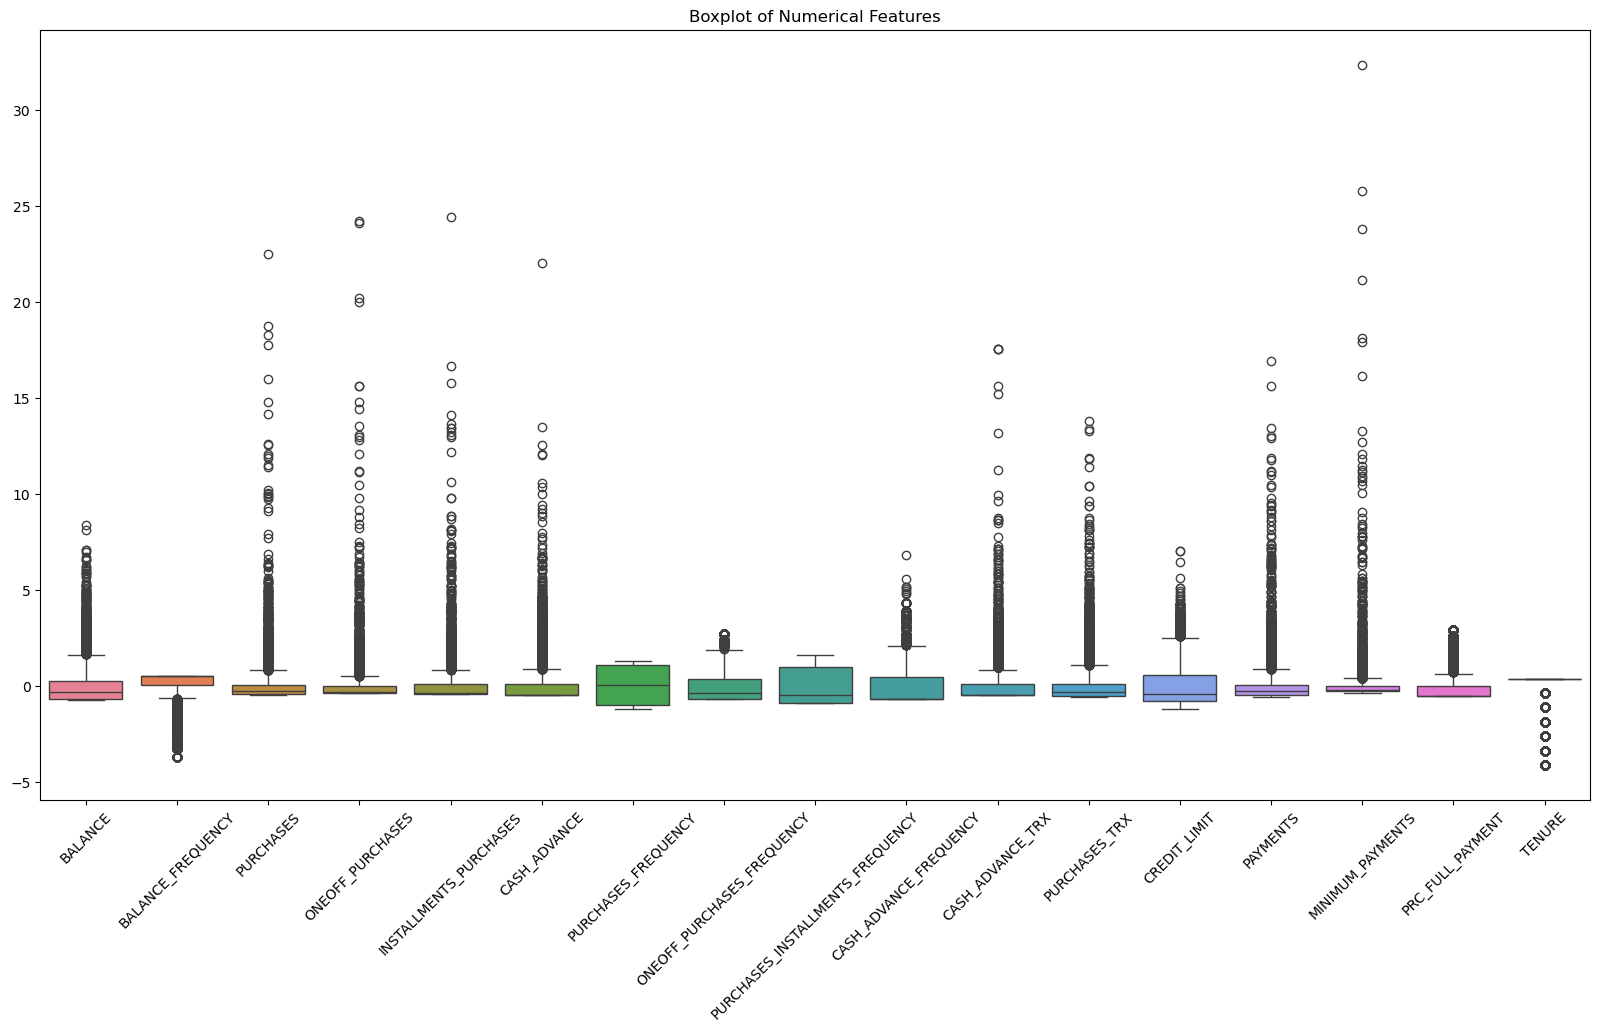

In [22]:
# Boxplot of numerical features
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

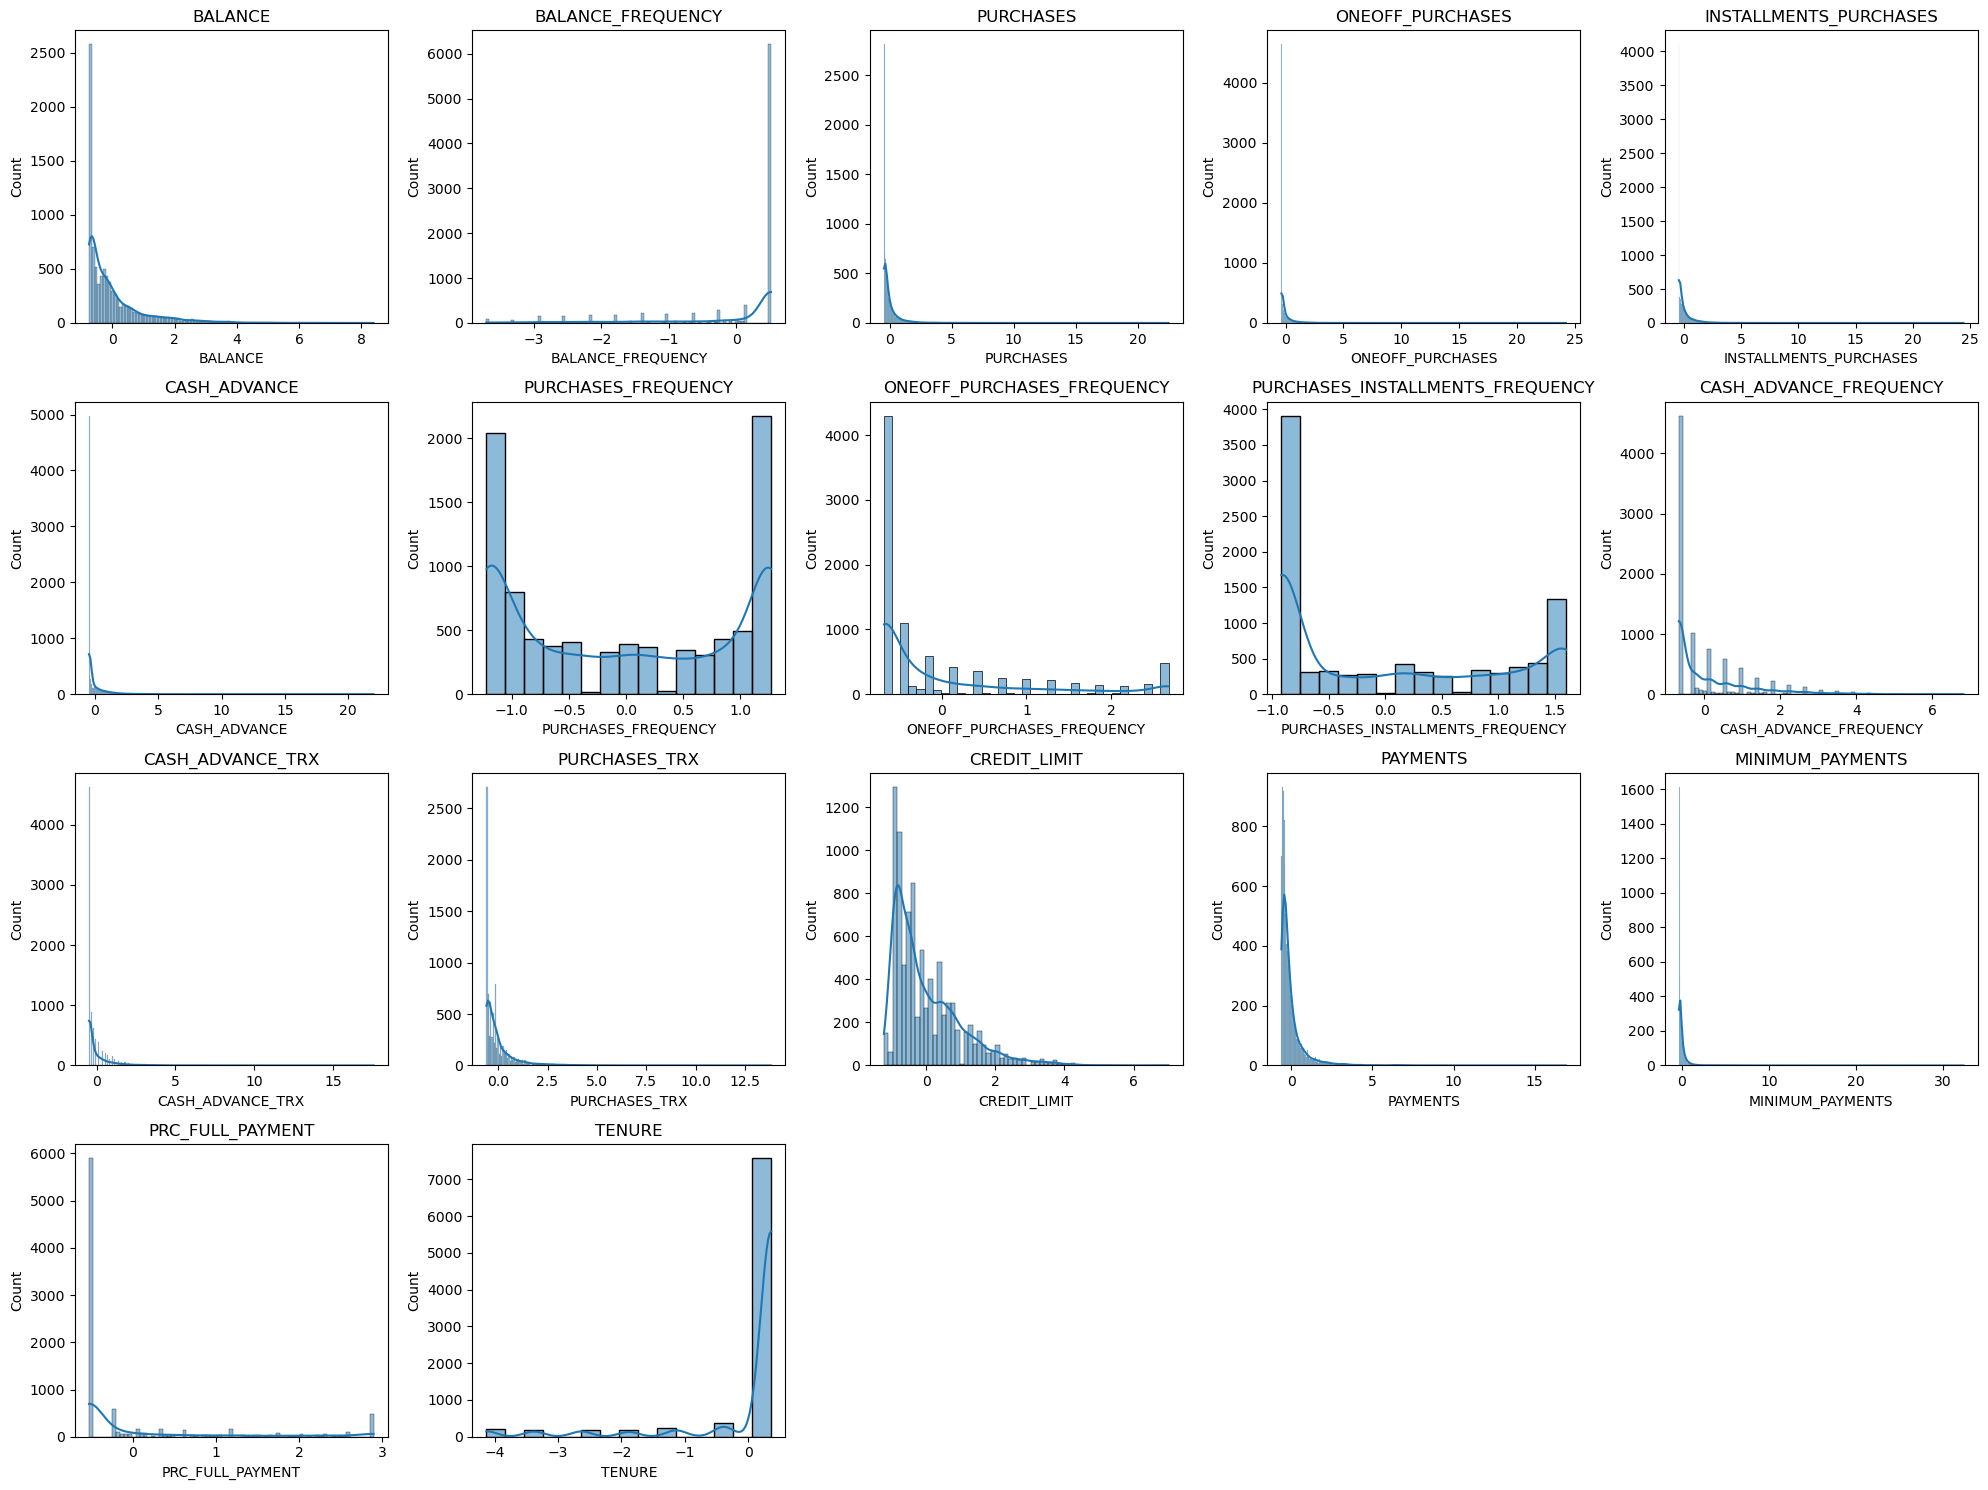

In [23]:
# Histogram Plot of Each Figure
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

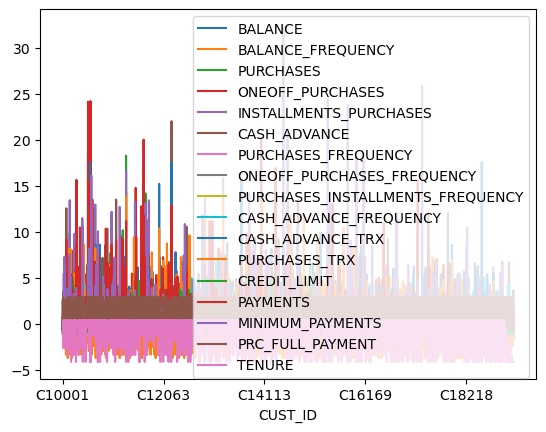

In [24]:
df.plot()
plt.show()

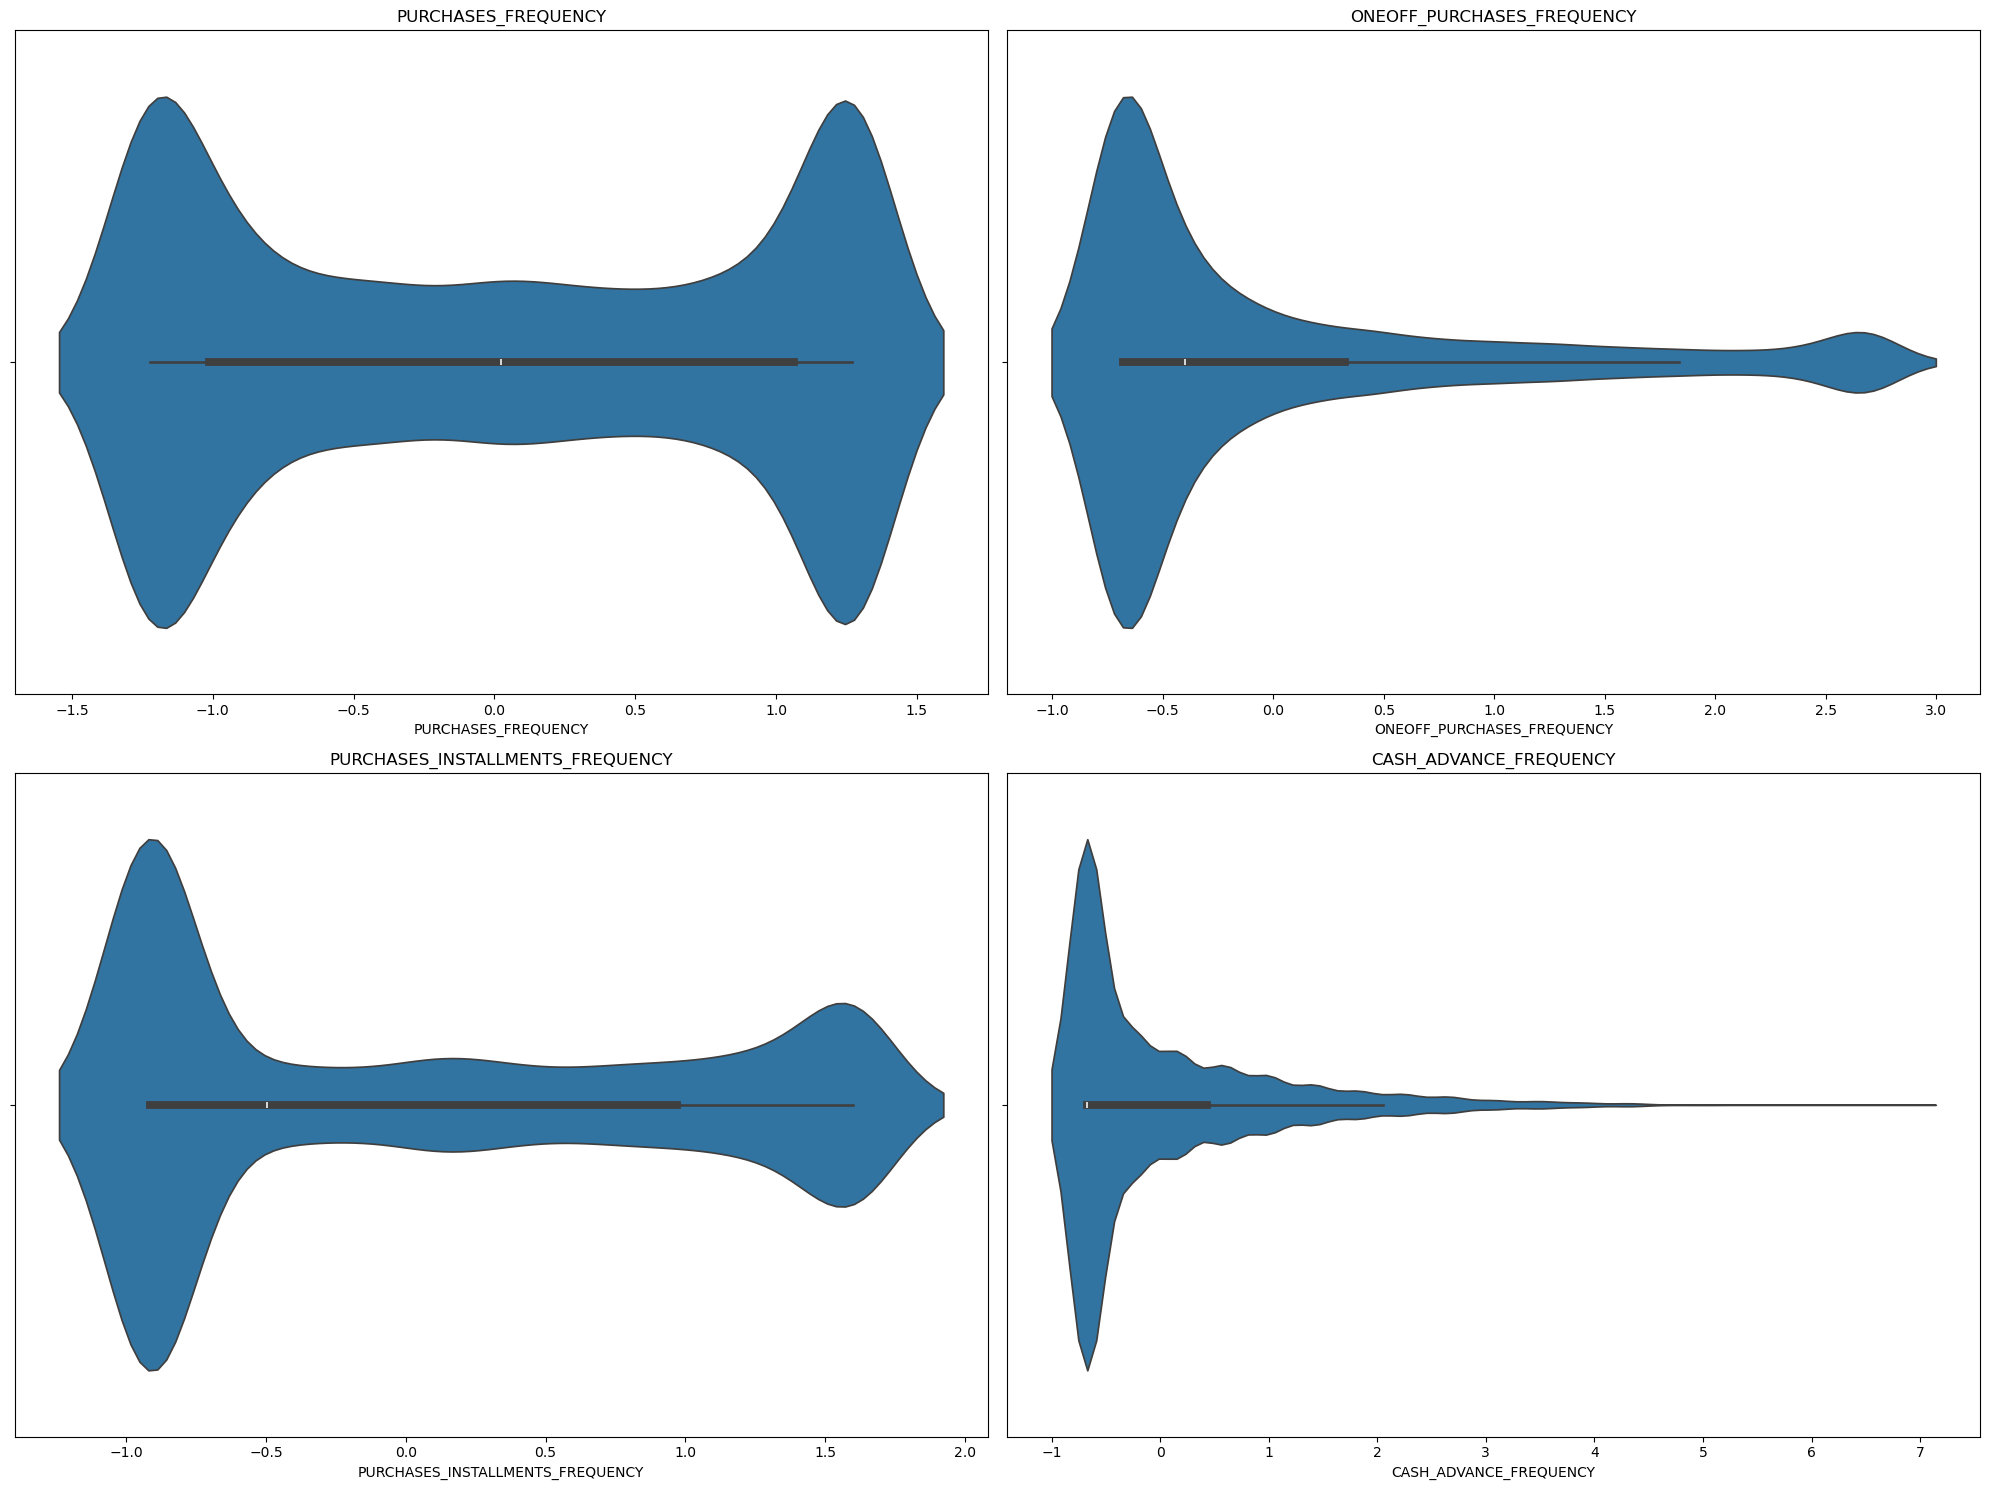

In [25]:
categorical_features = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


# Violin plot for categorical features
i = 0
plt.figure(figsize=(20, 15))
for col in categorical_features:
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=col, data=df)
    plt.title(col)
    i += 1
plt.tight_layout()
plt.show()

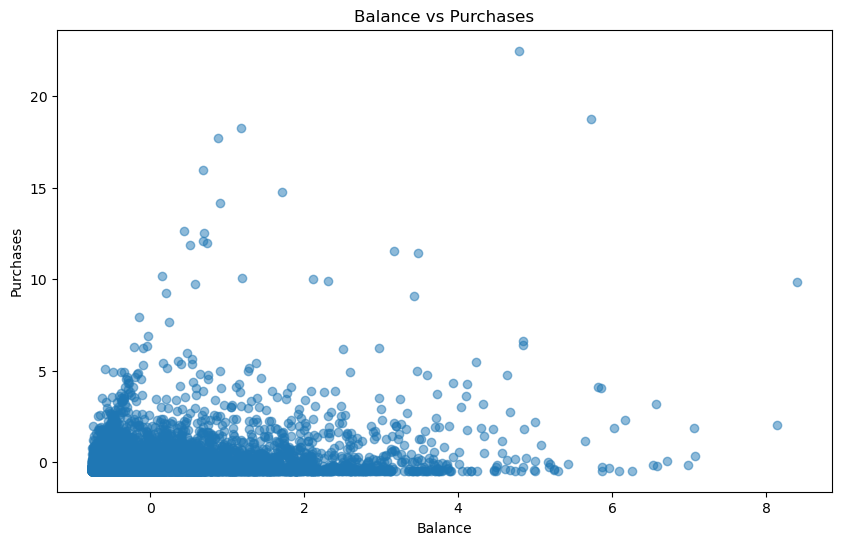

In [26]:
# Scatter plot of 'BALANCE' vs 'PURCHASES'
plt.figure(figsize=(10,6))
plt.scatter(df['BALANCE'], df['PURCHASES'], alpha=0.5)
plt.title('Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

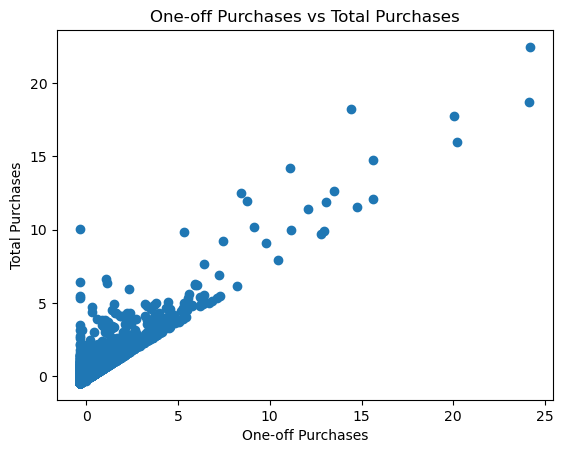

In [27]:
plt.scatter(df['ONEOFF_PURCHASES'], df['PURCHASES'])
plt.title('One-off Purchases vs Total Purchases')
plt.xlabel('One-off Purchases')
plt.ylabel('Total Purchases')
plt.show()


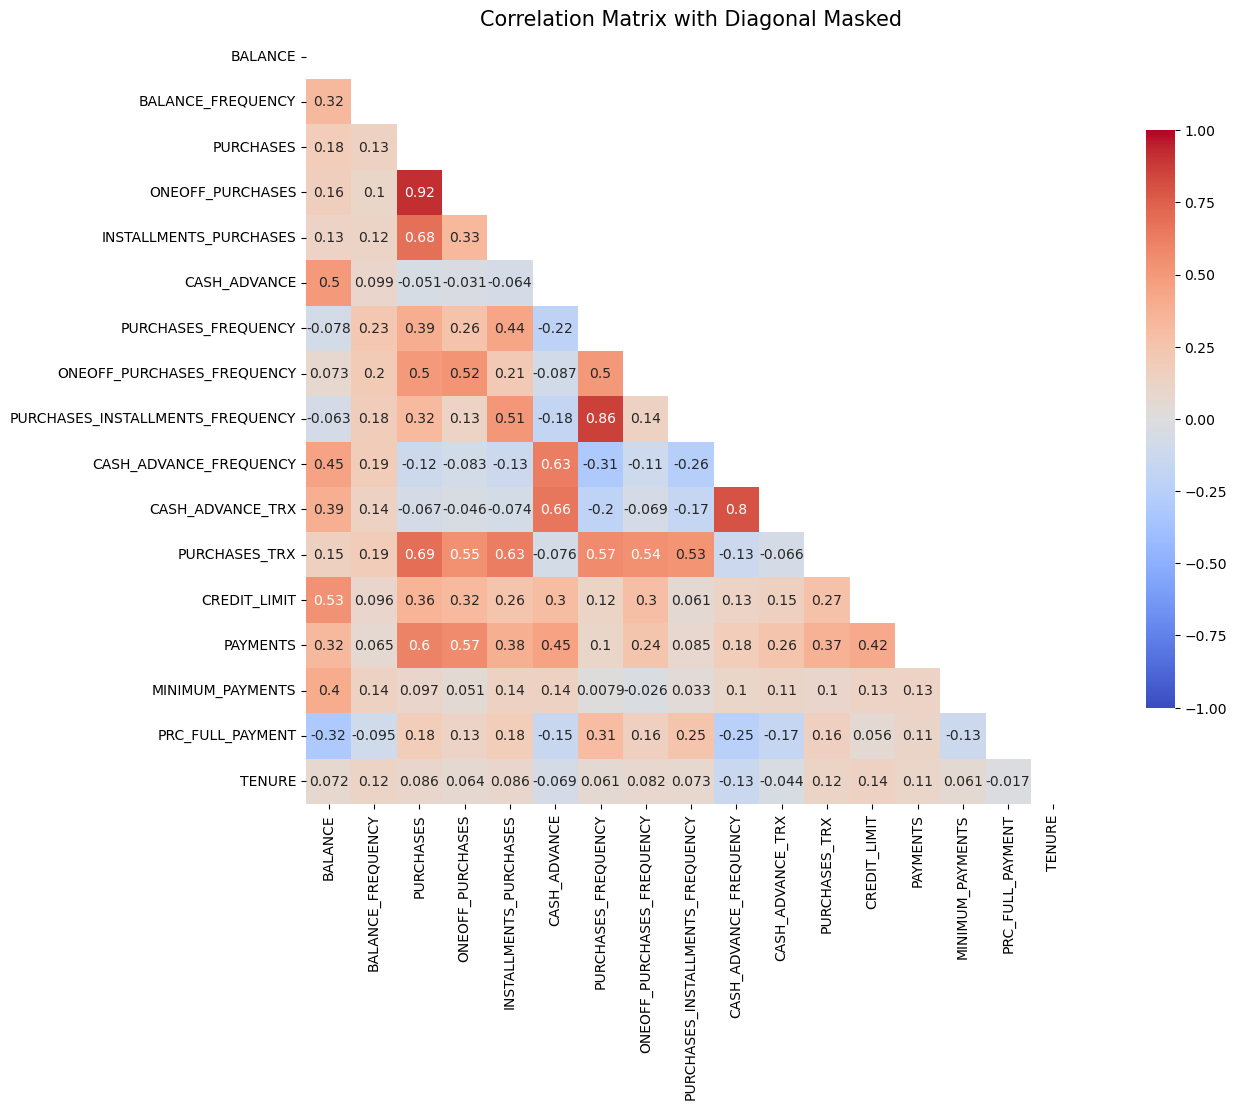

In [30]:
plt.figure(figsize=(18, 10))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=mask, square=True, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1)

plt.title("Correlation Matrix with Diagonal Masked", fontsize=15)
plt.show()

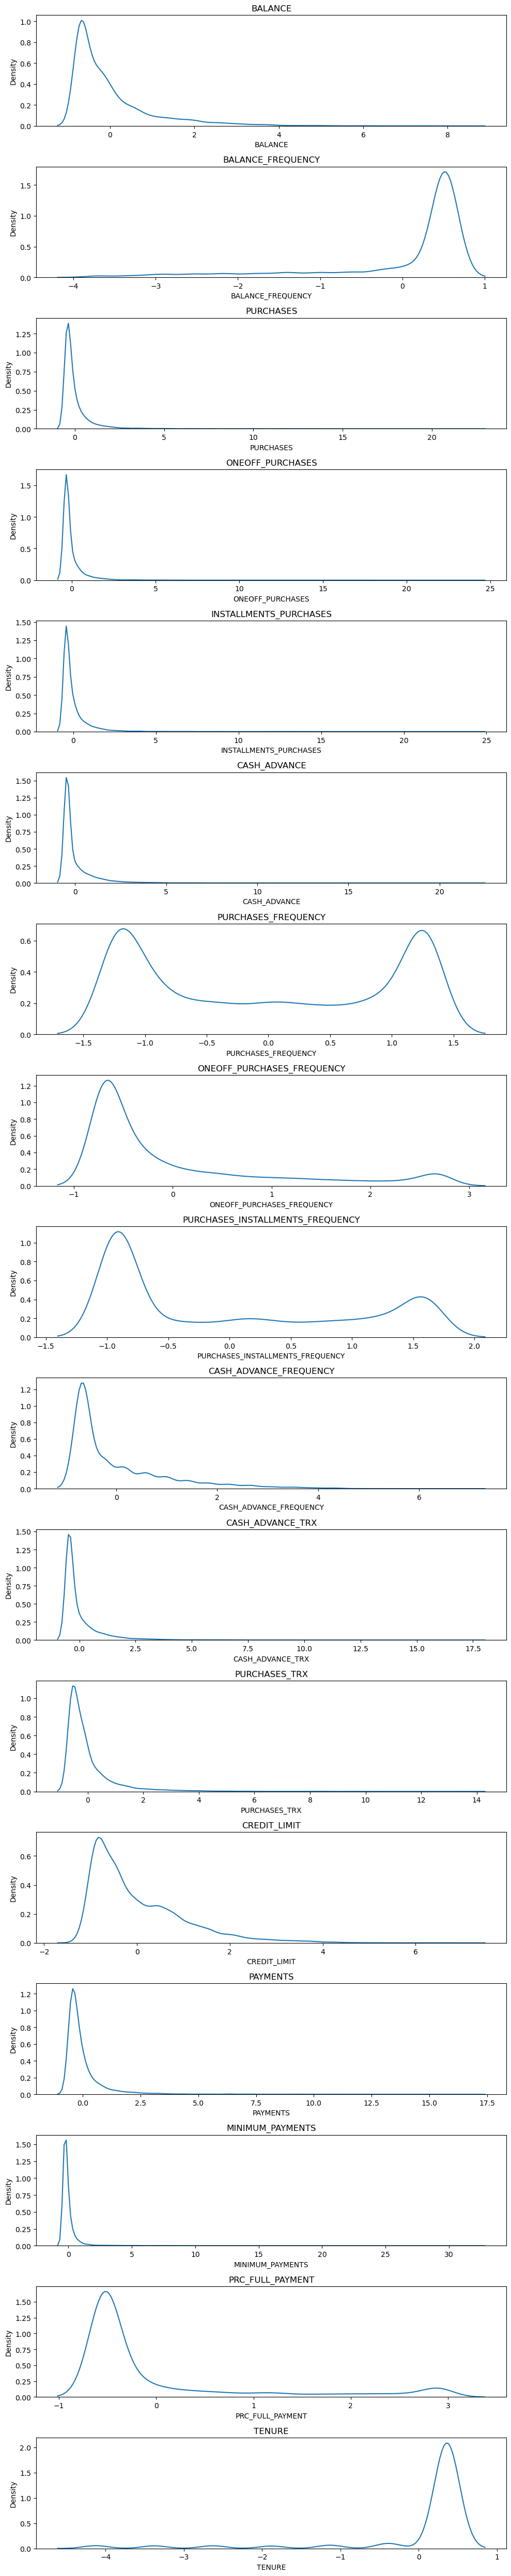

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.kdeplot(df[df.columns[i]])
  plt.title(df.columns[i])

plt.tight_layout()

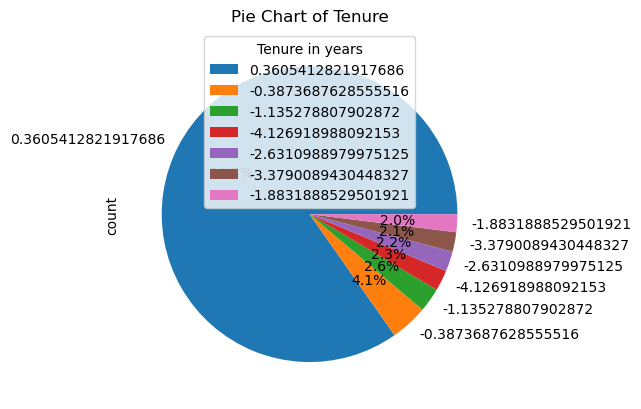

In [32]:
df['TENURE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Tenure')
plt.legend(title="Tenure in years")
plt.show()


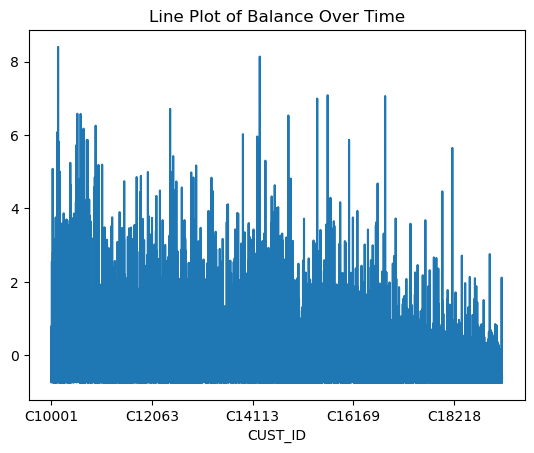

In [33]:
df['BALANCE'].plot()
plt.title('Line Plot of Balance Over Time')
plt.show()

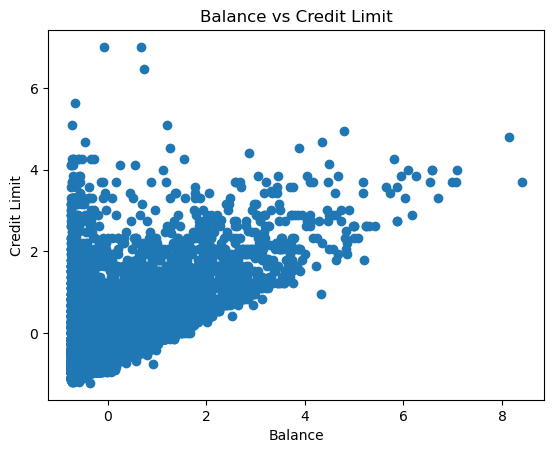

In [34]:
plt.scatter(df['BALANCE'], df['CREDIT_LIMIT'])
plt.title('Balance vs Credit Limit')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')
plt.show()

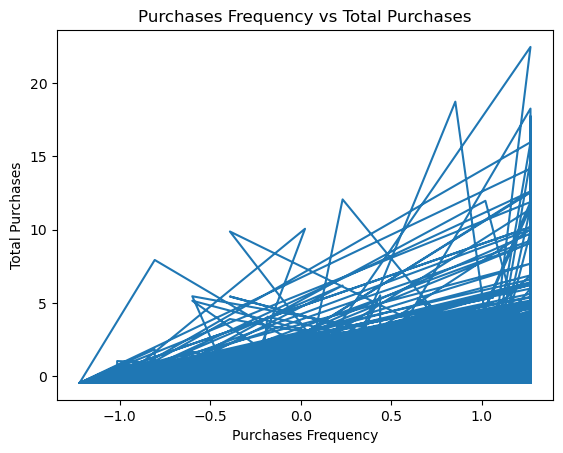

In [35]:
plt.plot(df['PURCHASES_FREQUENCY'], df['PURCHASES'])
plt.title('Purchases Frequency vs Total Purchases')
plt.xlabel('Purchases Frequency')
plt.ylabel('Total Purchases')
plt.show()

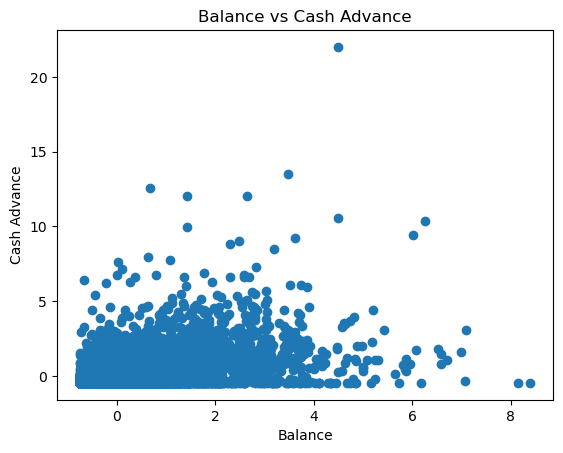

In [39]:
plt.scatter(x = df['BALANCE'], y = df['CASH_ADVANCE'])
plt.title('Balance vs Cash Advance')
plt.xlabel('Balance')
plt.ylabel('Cash Advance')
plt.show()

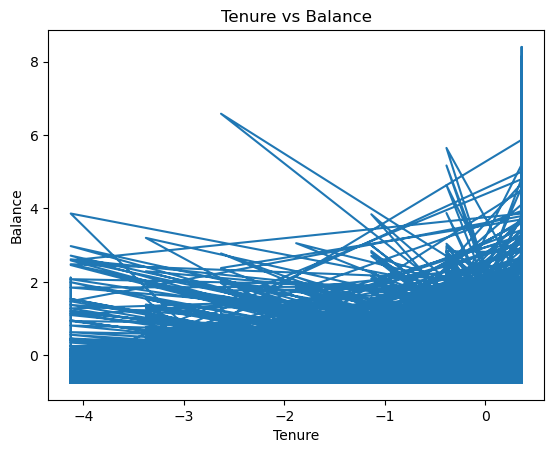

In [46]:
plt.plot(df['TENURE'], df['BALANCE'])
plt.title('Tenure vs Balance')
plt.xlabel('Tenure')
plt.ylabel('Balance')
plt.show()

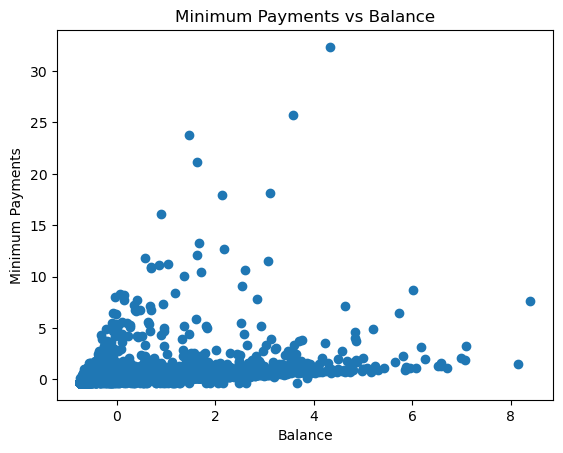

In [47]:
plt.scatter(df['BALANCE'], df['MINIMUM_PAYMENTS'])
plt.title('Minimum Payments vs Balance')
plt.ylabel('Minimum Payments')
plt.xlabel('Balance')
plt.show()


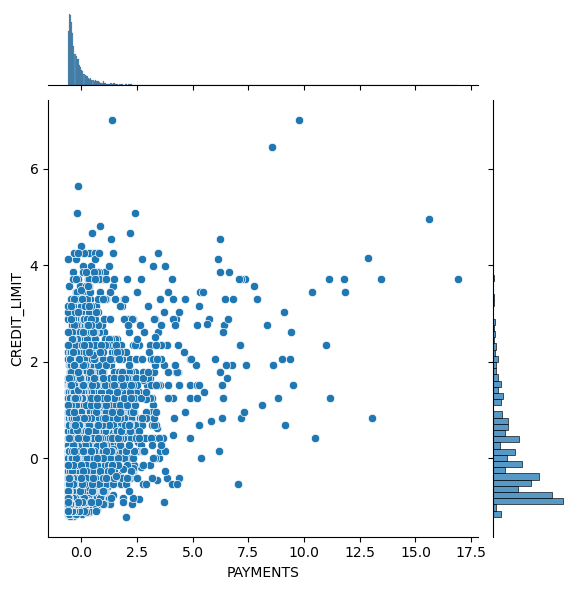

In [48]:
sns.jointplot(data=df, x='PAYMENTS', y='CREDIT_LIMIT')
plt.show()

# **PCA Analysis**

**Scaling**

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [51]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

pca_columns = [f'PCA{i+1}' for i in range((len(df.columns)))]
pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
0,-1.684484,-1.070217,0.469997,0.686725,0.056053,0.080315,0.817358,-0.006871,0.119547,-0.078525,-0.236376,-0.051641,-0.082369,-0.188378,0.149238,0.048147,-0.000160
1,-1.132568,2.510222,0.603830,-0.104391,0.701246,-1.074137,-0.391847,0.196580,0.667960,-0.778227,-0.870268,-0.610110,-0.033135,-0.731434,-0.533417,-0.082876,0.000003
2,0.968926,-0.383446,0.086175,1.252350,-2.160177,-0.394581,-1.522617,-0.258764,-0.859574,-0.001632,-0.762395,0.683279,0.697248,0.042265,0.221157,0.511270,0.000023
3,-0.897248,-0.017764,1.526942,1.031341,0.189525,-0.198574,-0.210129,-0.761288,-0.014698,0.393904,0.748709,0.101937,-0.112596,-0.413100,-0.084170,-0.014561,-0.000013
4,-1.600519,-0.681375,0.340010,1.024973,-0.436712,0.078247,0.691393,0.263664,0.575308,-0.122481,-0.455140,-0.110116,-0.036774,-0.041101,0.291180,-0.070558,-0.000081


In [52]:
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_


pca_summary = pd.DataFrame({
    'Eigenvalues': eigenvalues,
    'Explained Variance': explained_var,
    'Cumulative Explained Variance': cumulative_var,
})

pca_summary.index = pd.RangeIndex(start=1, stop=len(explained_var) + 1, name='Principal Component')

pca_summary

,Eigenvalues,Explained Variance,Cumulative Explained Variance
Principal Component,,,
1,4.641399,2.729930e-01,0.272993
2,3.454852,2.032039e-01,0.476197
3,1.500345,8.824573e-02,0.564443
4,1.271731,7.479937e-02,0.639242
5,1.054981,6.205077e-02,0.701293
6,0.974672,5.732724e-02,0.758620
7,0.830031,4.881988e-02,0.807440
8,0.735091,4.323579e-02,0.850676
9,0.642875,3.781196e-02,0.888488


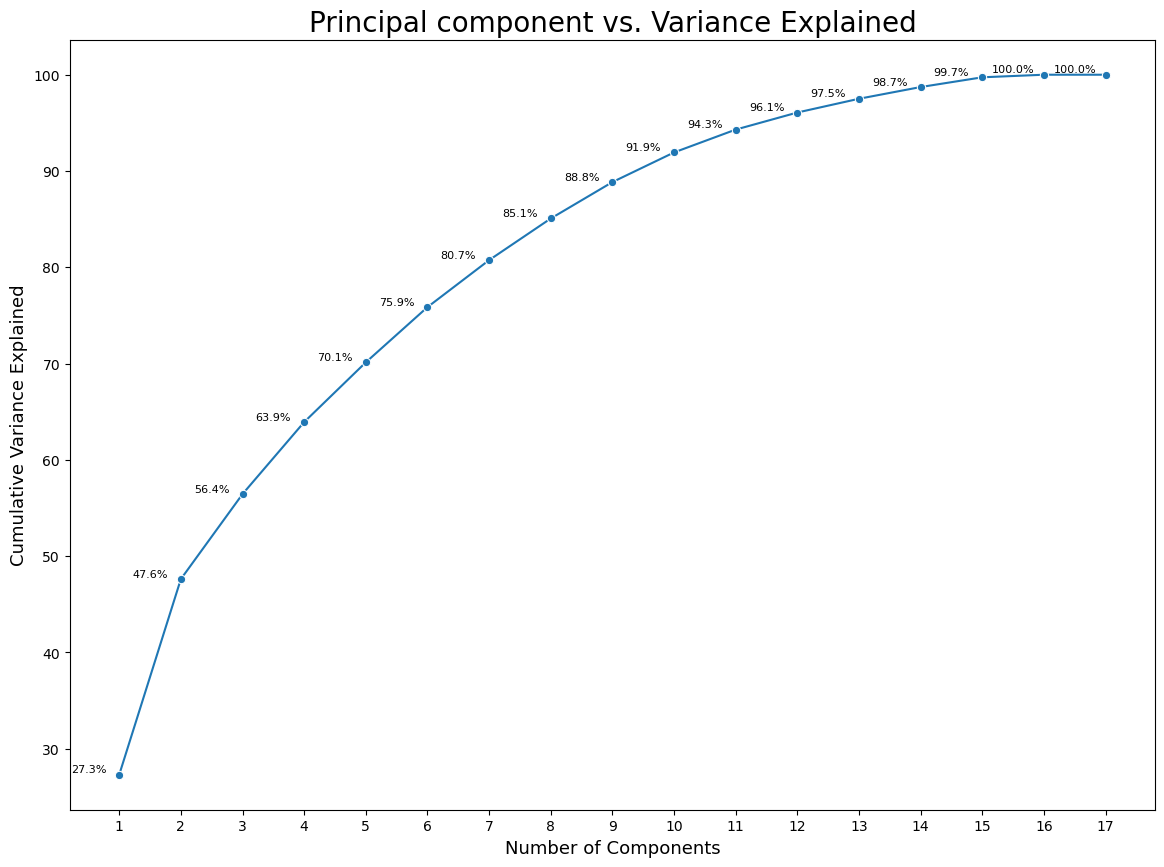

In [53]:
plt.figure(figsize=(14, 10))
sns.lineplot(x=np.arange(1, len(pca.explained_variance_ratio_) + 1), y=np.cumsum(pca.explained_variance_ratio_)*100, marker='o')

for i, percentage in enumerate(np.cumsum(pca.explained_variance_ratio_)*100):
    plt.text(i + 0.5, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('Number of Components', fontsize = 13)
plt.ylabel('Cumulative Variance Explained', fontsize = 13)
plt.title('Principal component vs. Variance Explained', fontsize = 20)
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()


Feature contribution to Principal Components:

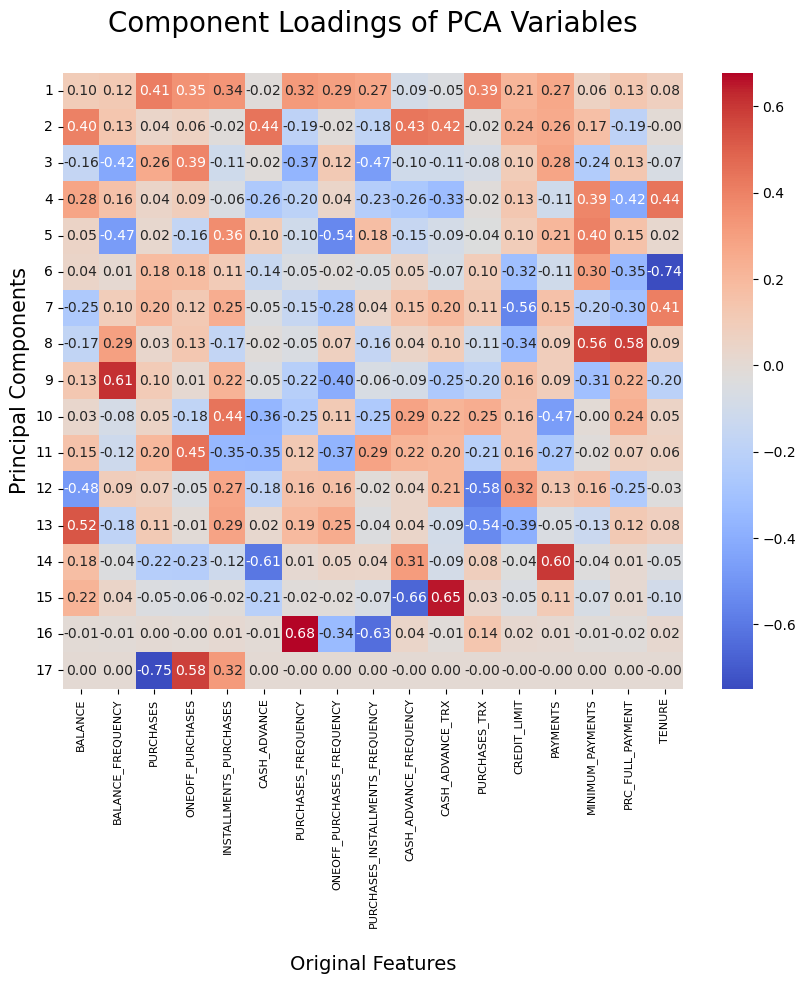

In [54]:
component_loadings = pca.components_

component_df = pd.DataFrame(component_loadings, columns=df.columns)

# Visualize component loadings using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(component_df, annot=True, cmap='coolwarm', fmt='.2f')

plt.yticks(ticks=np.arange(0.5,
                           len(component_df), 1),
           labels=np.arange(1, len(component_df) + 1, 1),
           rotation=0)
plt.xticks(fontsize = 8, rotation=90)
plt.title('Component Loadings of PCA Variables\n', fontsize = 20)
plt.xlabel('\nOriginal Features', fontsize = 14)
plt.ylabel('Principal Components', fontsize = 15)
plt.show()

# **Interpretation**

**Feature Contribution to Principal Components:**

Magnitude of Values: The intensity of colors in the heatmap indicates the strength and direction of the relationship between the original features and the principal components.


High Positive/Negative Values: Strong positive or negative values indicate a significant contribution of a particular feature to a principal component.

# Patterns and Relationships:

Correlation between Features and Components: You can observe which original features are more strongly associated with which principal components.

# **Dimension Reduction Insights:**

Identifying Key Features: Features with high loadings on a few principal components might represent key aspects of the data that capture most of its variation.

Dimension Reduction Possibility: If certain features show low loadings across all components, it might suggest they are less critical or redundant for explaining the variance in the dataset.

# **Viz of Data in 2D**

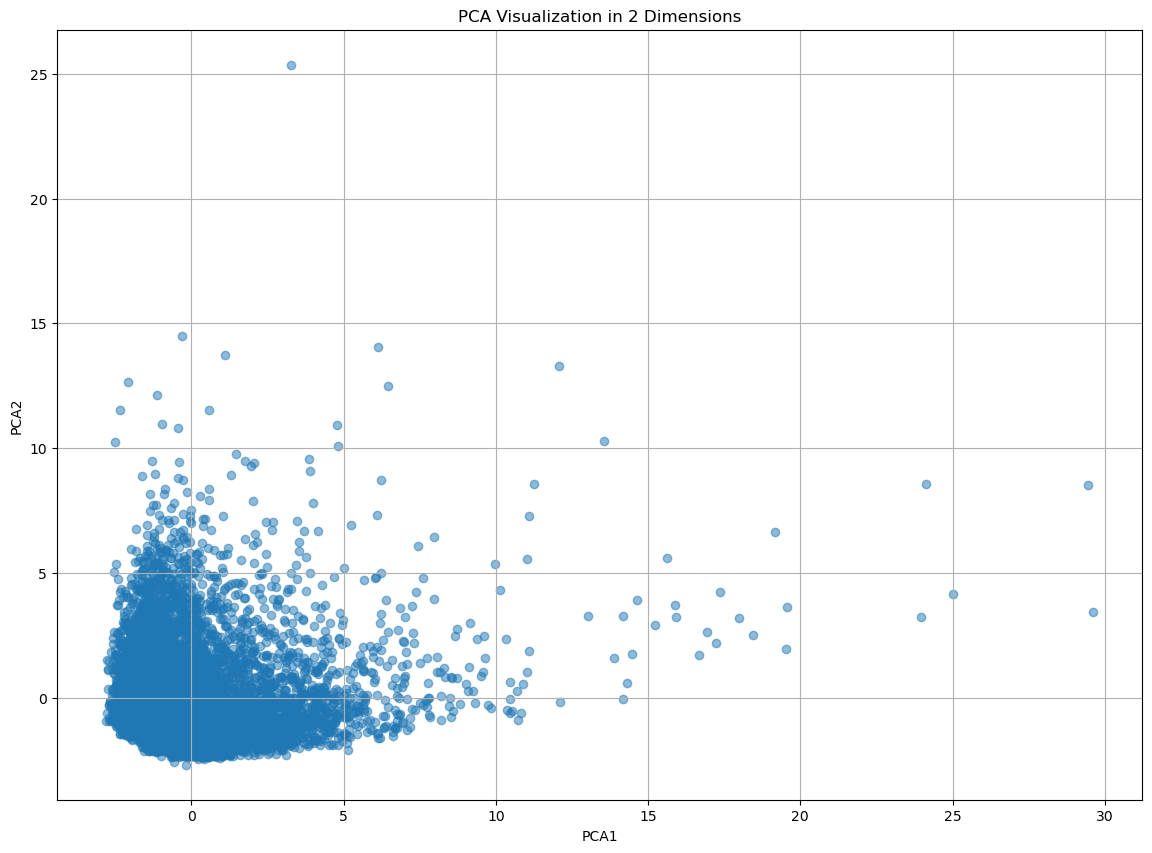

In [55]:
plt.figure(figsize=(14, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.title('PCA Visualization in 2 Dimensions')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

# **K**-**MEANS**

In [56]:
from sklearn.metrics import silhouette_score

n_clusters = 30
cost = []
silhouette_scores = []
for i in range(2, n_clusters+1):  # Changed the range to start from 2
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    cost.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

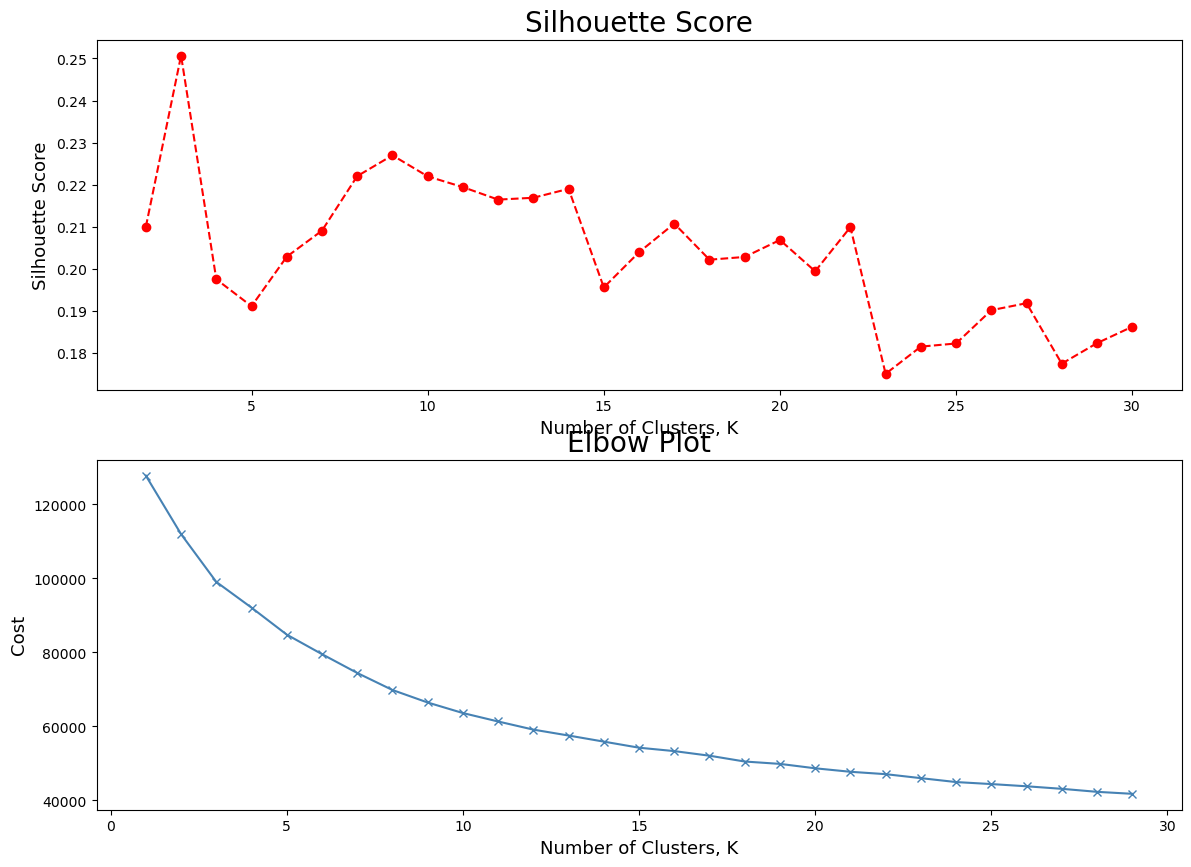

In [57]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(range(2, n_clusters+1), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Score', fontsize=20)
plt.xlabel('Number of Clusters, K', fontsize=13)
plt.ylabel('Silhouette Score', fontsize=13)

plt.subplot(2, 1, 2)
plt.plot(range(1, n_clusters), cost, 'bx-', c='steelblue')
plt.title('Elbow Plot', fontsize=20)
plt.ylabel('Cost', fontsize=13)
plt.xlabel('Number of Clusters, K', fontsize=13)
plt.show()

In [58]:
kmeans= KMeans(4, random_state = 0)
kmeans.fit(df_scaled)
labels=kmeans.labels_

inertia = kmeans.inertia_
n_iter = kmeans.n_iter_
n_features_in = kmeans.n_features_in_

print(f"\nSum of Squared Distances to Closest Cluster Center (Inertia): {inertia:.1f}")
print("\nNumber of Iterations Run: ", n_iter)
print("\nNumber of Features Seen During Fit:", n_features_in)


Sum of Squared Distances to Closest Cluster Center (Inertia): 99048.0

Number of Iterations Run:  16

Number of Features Seen During Fit: 17


In [59]:
clusters_df = df.copy()
clusters_df['cluster_label'] = labels
clusters_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297335,-0.525588,0.360541,1
C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541,2
C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088525,-0.525588,0.360541,0
C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357049,-0.525588,0.360541,1
C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541,1


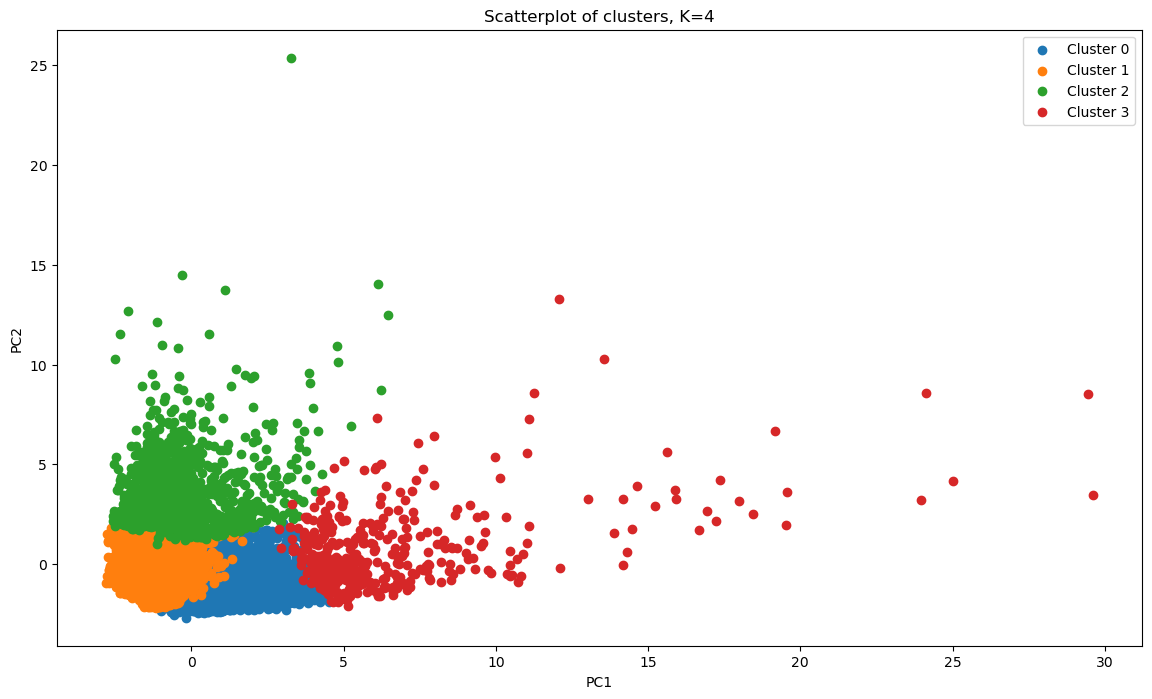

In [60]:
plt.figure(figsize=(14, 8))

clusters_df = pca_df[['PCA1', 'PCA2']]
clusters_df['cluster_label'] = labels
for cluster_name, cluster_data in clusters_df.groupby('cluster_label'):
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_name}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of clusters, K=4')
plt.legend()
plt.show()

# **INTERPRETATION**
The scatter plot allows us to see how the data points are distributed in the reduced dimensional space defined by PCA1 and PCA2.
It helps in identifying clusters, trends, and outliers in the data.

DIMENSIONALITY **REDUCTION**

In [61]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [62]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [63]:
data_scaled.shape

(8949, 17)

In [64]:
autoencoder.fit(data_scaled, data_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6751
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3580
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2721
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2074
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1873
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1736
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1578
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1442
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1265
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1232
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1243
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1139
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1084
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1008
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0970
Epoc

In [66]:
autoencoder.save_weights('autoencoder.weights.h5')

In [67]:
pred = encoder.predict(data_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [68]:
pred.shape

(8949, 10)

**DIMENSIONALITY REDUCTION USING SIMPLE AUTOENCODER NURAL NETWORK**

It implements dimensionality reduction using a simple autoencoder neural network architecture. Through the process of unsupervised learning, the autoencoder model learns to encode high-dimensional input data into a lower-dimensional representation while attempting to reconstruct the original input as closely as possible. By training the autoencoder on scaled and normalized data, the model captures important features and patterns, effectively compressing the information into a lower-dimensional space. The encoder part of the trained autoencoder is then utilized to transform new input data into this reduced representation, enabling efficient dimensionality reduction. This reduced-dimensional representation, with dimensions reduced from 17 to 10 , retains essential information while discarding redundant or less important features

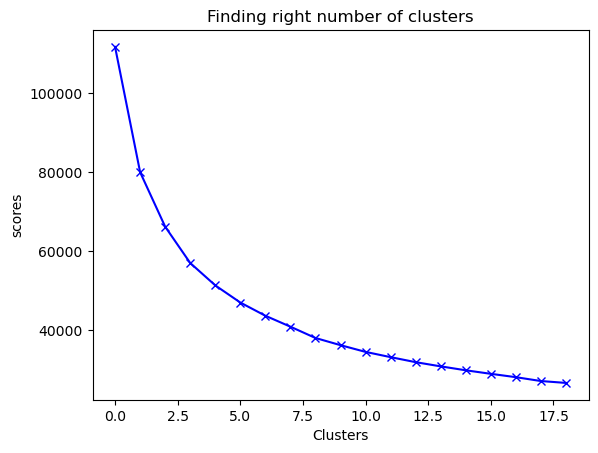

In [69]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

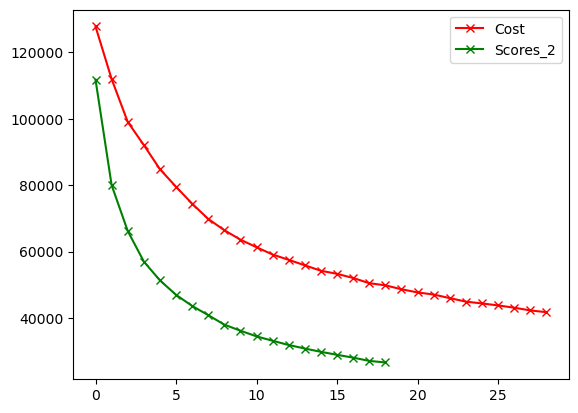

In [70]:
plt.plot(cost, 'bx-', color = 'r', label='Cost')
plt.plot(scores_2, 'bx-', color = 'g', label='Scores_2')
plt.legend()

In [71]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(data_scaled)

In [72]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297335,-0.525588,0.360541,NaN
C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541,NaN
C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088525,-0.525588,0.360541,NaN
C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357049,-0.525588,0.360541,NaN
C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541,NaN


In [73]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.206322,-0.127435
1,2.064384,-1.626870
2,-1.111965,0.647905
3,-0.455696,0.085520
4,-2.470870,-0.195918


In [74]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.206322,-0.127435,0
1,2.064384,-1.626870,1
2,-1.111965,0.647905,0
3,-0.455696,0.085520,0
4,-2.470870,-0.195918,0


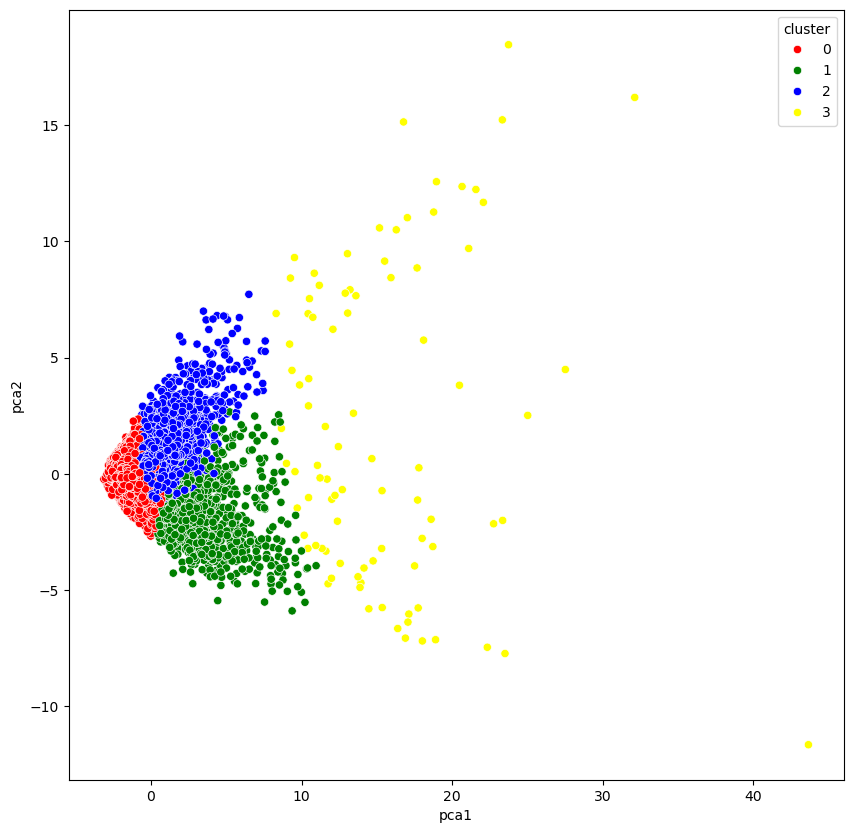

In [75]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

# **Hierachical Clustering**

Single Linkage

In [76]:
model = AgglomerativeClustering(n_clusters=4, linkage='single')
clusters = model.fit_predict(df_scaled)

clusters_df_agg = df.copy()
clusters_df_agg['cluster_label'] = clusters
clusters_df_agg.cluster_label.value_counts()
cluster_counts = clusters_df_agg['cluster_label'].value_counts().reset_index()
cluster_counts.columns = ['Cluster Label', 'No of Observation']
cluster_counts = cluster_counts.sort_values('Cluster Label')
cluster_counts.reset_index(drop=True)
cluster_counts

,Cluster Label,No of Observation
0,0,8946
3,1,1
1,2,1
2,3,1


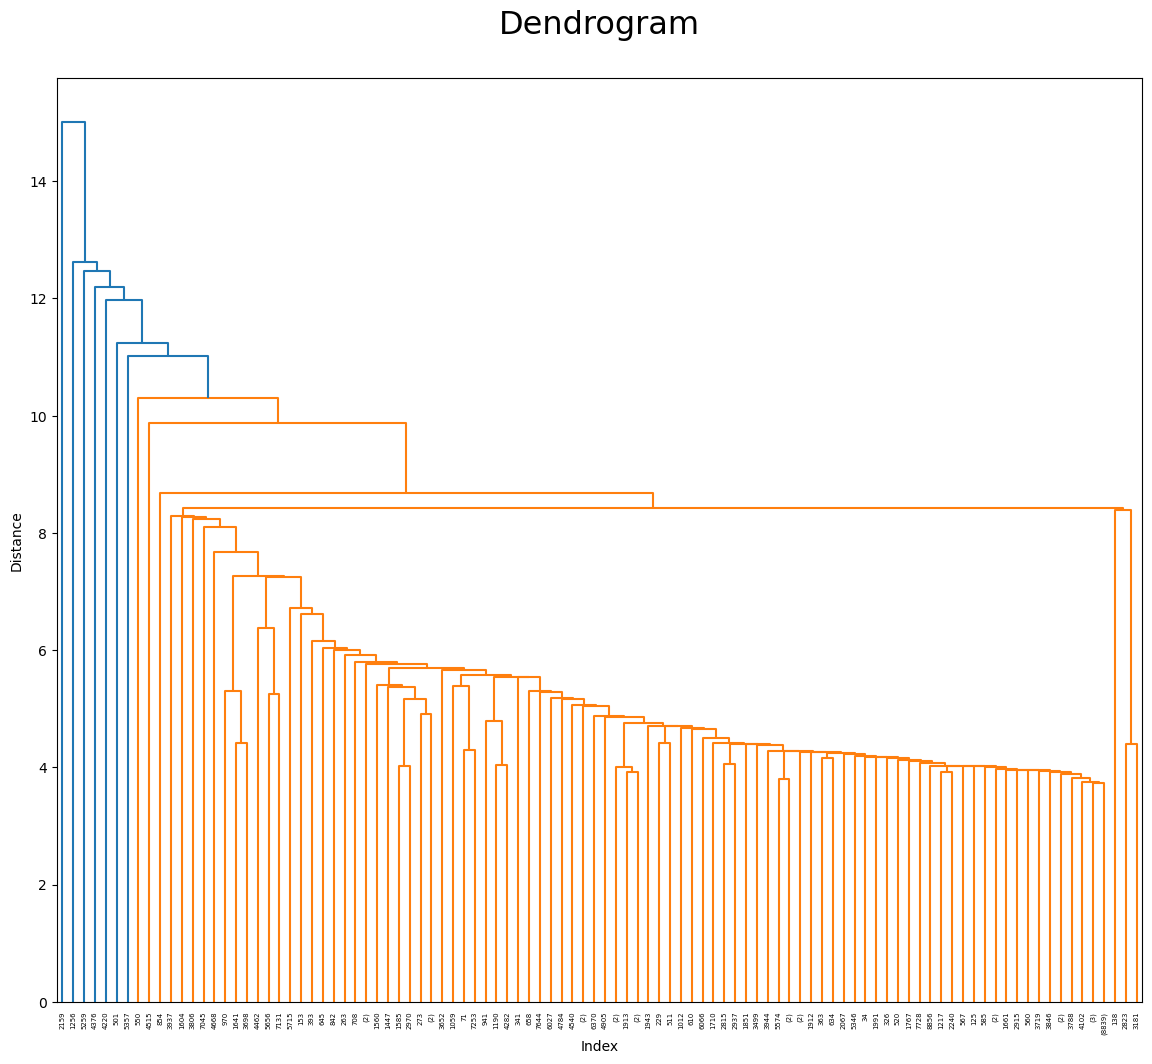

In [77]:
import sys
sys.setrecursionlimit(10**5)  # Set recursion limit to a higher value

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calculate linkage matrix
linkage_matrix = linkage(df_scaled, method='single')

# Plot dendrogram with adjustments
plt.figure(figsize=(14, 12))
dendrogram(linkage_matrix, truncate_mode='lastp', p=100)  # Truncate to show 50 clusters
plt.title('Dendrogram\n', fontsize=23)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [78]:
clusters_df_agg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297335,-0.525588,0.360541,0
C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541,0
C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088525,-0.525588,0.360541,0
C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357049,-0.525588,0.360541,0
C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541,0


2.Complete Linkage

In [79]:
model = AgglomerativeClustering(n_clusters=4, linkage='complete')
clusters = model.fit_predict(df_scaled)

clusters_df_agg = df.copy()
clusters_df_agg['cluster_label'] = clusters
clusters_df_agg['cluster'] = clusters_df_agg['cluster_label']
clusters_df_agg.cluster_label.value_counts()
cluster_counts = clusters_df_agg['cluster_label'].value_counts().reset_index()
cluster_counts.columns = ['Cluster Label', 'No of Observation']
cluster_counts = cluster_counts.sort_values('Cluster Label')
cluster_counts.reset_index(drop=True)
cluster_counts

,Cluster Label,No of Observation
0,0,8918
1,1,23
3,2,1
2,3,7


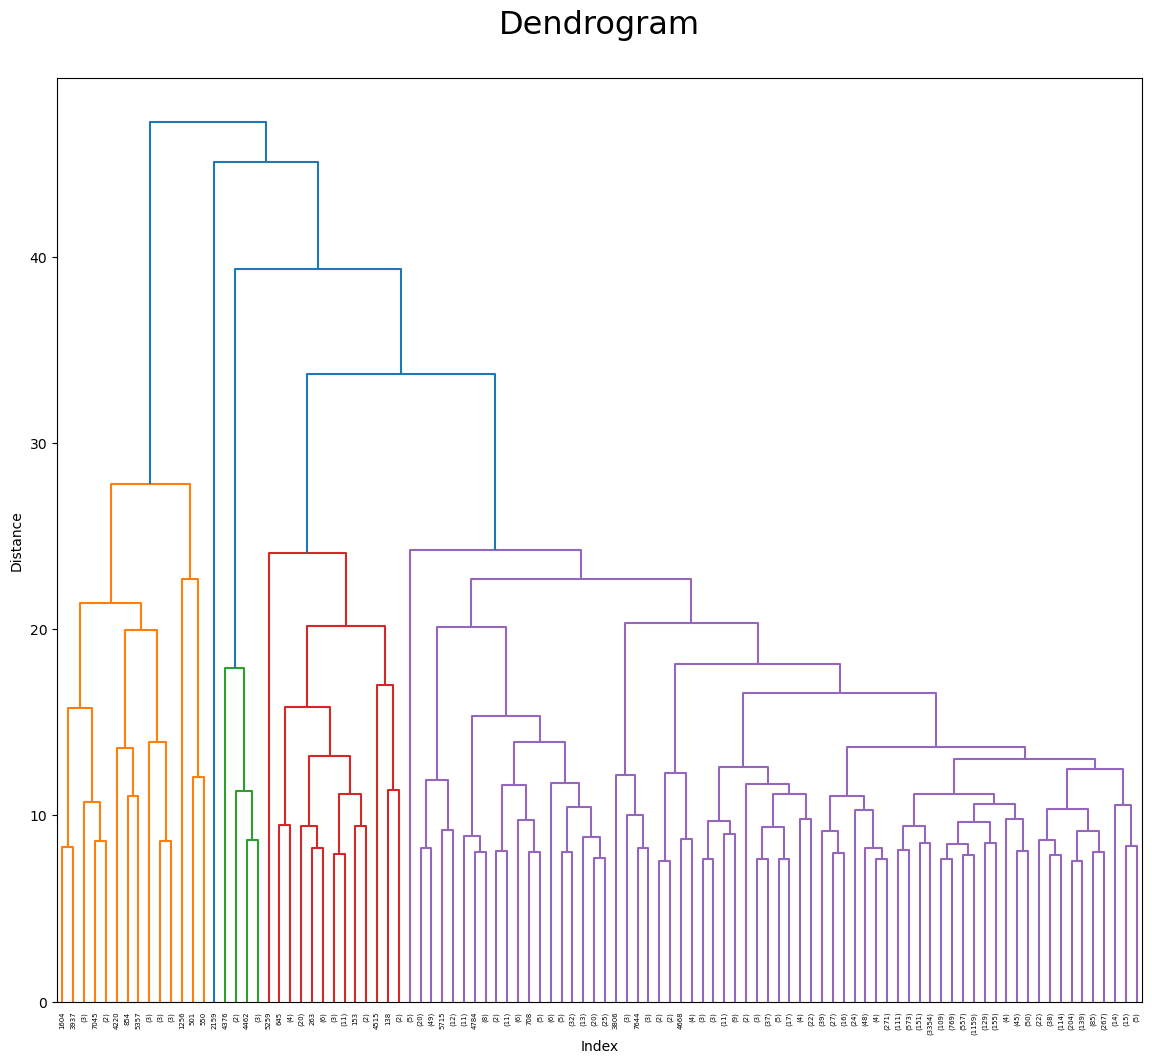

In [80]:
linkage_matrix = linkage(df_scaled, method='complete')

# Plot dendrogram with adjustments
plt.figure(figsize=(14, 12))
dendrogram(linkage_matrix, orientation='top', leaf_rotation=90, truncate_mode='lastp', p=100)
plt.title('Dendrogram\n', fontsize=23)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [81]:
clusters_df_agg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label,cluster
CUST_ID,,,,,,,,,,,,,,,,,,,
C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297335,-0.525588,0.360541,0,0
C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541,0,0
C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088525,-0.525588,0.360541,0,0
C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357049,-0.525588,0.360541,0,0
C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541,0,0


**3.Ward** **Linkage**

In [82]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = model.fit_predict(df)

clusters_df_agg = df.copy()
clusters_df_agg['cluster_label'] = clusters
clusters_df_agg.cluster_label.value_counts()
cluster_counts = clusters_df_agg['cluster_label'].value_counts().reset_index()
cluster_counts.columns = ['Cluster Label', 'No of Observation']
cluster_counts = cluster_counts.sort_values('Cluster Label')
cluster_counts.reset_index(drop=True)
cluster_counts

,Cluster Label,No of Observation
1,0,2858
0,1,4668
2,2,1400
3,3,23


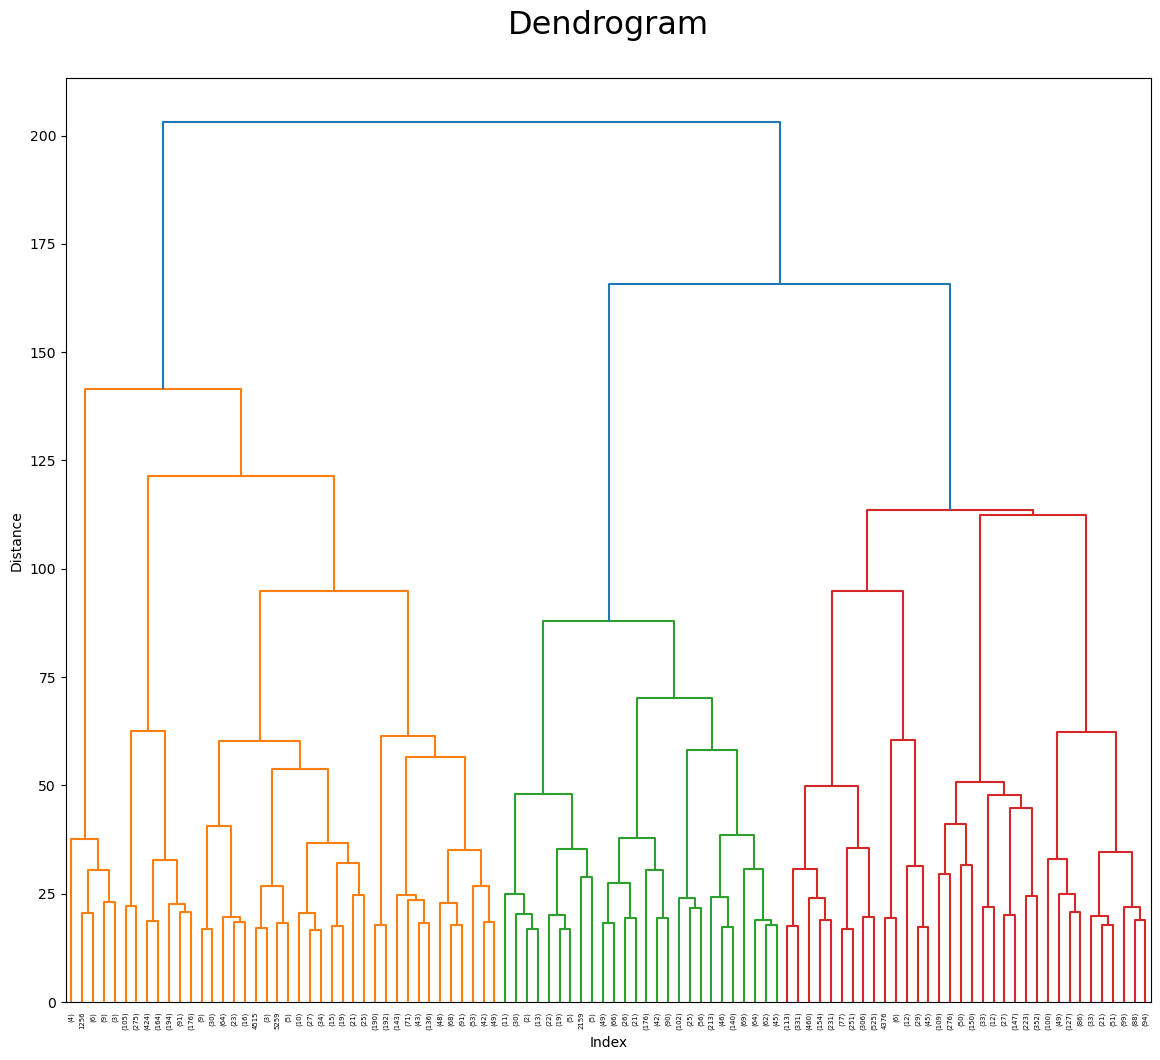

In [83]:
linkage_matrix = linkage(df_scaled, method='ward')

# Plot dendrogram with adjustments
plt.figure(figsize=(14, 12))
dendrogram(linkage_matrix, truncate_mode='lastp', p=100)
plt.title('Dendrogram\n', fontsize=23)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [84]:
clusters_df_agg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297335,-0.525588,0.360541,1
C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541,2
C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088525,-0.525588,0.360541,0
C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357049,-0.525588,0.360541,1
C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541,1
